# Chapter 1 문자열을 사용한 작업
Working with Strings

<br></br>
## 1 토큰화
텍스트를 token이라는 작은 부분으로 분할

In [1]:
# <<toeknizer>>
# 1 WordPunctTokenizer
# 2 RegexpTokenizer(정규식활용) - WordPunctTokenizer - WhitespaceTokenizer
# 3 TreebankWordTokenizer

### 01 Text to Sentence-token
sent_tokenize() : text 를 문장으로 나누기

In [2]:
# 문장부호를 기준으로 문장을 나눈다
from nltk.tokenize import sent_tokenize

text=" Welcome readers. I hope you find it interesting. Please do reply."
print(sent_tokenize(text))

[' Welcome readers.', 'I hope you find it interesting.', 'Please do reply.']


In [3]:
import nltk
# .tokenize() NLTK의 영어 package를 활용하여 tokenized 

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
text=" Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
print(tokenizer.tokenize(text))

[' Hello everyone.', 'Hope all are fine and doing well.', 'Hope you find the book interesting']


In [4]:
# 언어별 pickle을 활용하여 Token으로 나눈다 : 프랑스어
nltk.data.load('tokenizers/punkt/french.pickle')

### 02 Sentence  to  Word-token
word_tokenize() : 문장을 단어로 나누기

In [5]:
import nltk
text = nltk.word_tokenize("PierreVinken , 59 years old , will join as a nonexecutive director on Nov. 29 .")
print(text)

['PierreVinken', ',', '59', 'years', 'old', ',', 'will', 'join', 'as', 'a', 'nonexecutive', 'director', 'on', 'Nov.', '29', '.']


### 03 TreebankWordTokenizer 를 사용한 토큰화
TreebankWordTokenizer()

In [6]:
# Penn Treebank Corpus 에 따른 기준을 사용하여, 문법별로 나눈다
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize("Have a nice day. I hope you find the book interesting"))

['Have', 'a', 'nice', 'day.', 'I', 'hope', 'you', 'find', 'the', 'book', 'interesting']


In [7]:
print(tokenizer.tokenize(" Don't hesitate to ask questions"))

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


In [8]:
text = nltk.word_tokenize(" Don't hesitate to ask questions")
print(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


In [9]:
# WordPunctTokenizer : 문장부호도 token 으로 변환
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(" Don't hesitate to ask questions"))

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']


### 03 RegexpTokenizer 를 사용한 토큰화
RegexpTokenizer("정규식")

In [10]:
# import re
# re.findall() , re.split() 함수로도 구현이 가능하다
# white space, Tab, Space, newline을 사용해서 token을 생성

In [11]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']+") # 단어별 token
print(tokenizer.tokenize("Don't hesitate to ask questions"))

["Don't", 'hesitate', 'to', 'ask', 'questions']


In [12]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\s+', gaps=True) # White Space (공백)을 활용하여 tokenize
print(tokenizer.tokenize("Don't hesitate to ask questions"))

["Don't", 'hesitate', 'to', 'ask', 'questions']


In [13]:
# regexp_tokenize(text , pattern = 'regex')
from nltk.tokenize import regexp_tokenize

sent="Don't hesitate to ask questions"
print(regexp_tokenize(sent, pattern='\w+|\$[\d\.]+|\S+')) # 단어, 부호별 모두 나누기

['Don', "'t", 'hesitate', 'to', 'ask', 'questions']


In [14]:
from nltk.tokenize import RegexpTokenizer

sent=" She secured 90.56 % in class X . She is a meritorious student"
capt = RegexpTokenizer('[A-Z]\w+')  # 대문자로 시작하는 단어를 기준으로 tokenize
print(capt.tokenize(sent))

['She', 'She']


In [15]:
from nltk.tokenize import BlanklineTokenizer

sent=" She secured 90.56 % in class X . She is a meritorious student"
print(BlanklineTokenizer().tokenize(sent))

[' She secured 90.56 % in class X . She is a meritorious student']


In [16]:
# WhitespaceTokenizer()
from nltk.tokenize import WhitespaceTokenizer

sent=" She secured 90.56 % in class X . She is a meritorious student"
print(WhitespaceTokenizer().tokenize(sent))

['She', 'secured', '90.56', '%', 'in', 'class', 'X', '.', 'She', 'is', 'a', 'meritorious', 'student']


In [17]:
import nltk
sent= "She secured 90.56 % in class X. She is a meritorious student"
print(sent.split())     # 기본 분할기준은 WhiteSpace
print(sent.split(' '))  # 명시적 표시

['She', 'secured', '90.56', '%', 'in', 'class', 'X.', 'She', 'is', 'a', 'meritorious', 'student']
['She', 'secured', '90.56', '%', 'in', 'class', 'X.', 'She', 'is', 'a', 'meritorious', 'student']


In [18]:
sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(sent.split('\n'))  # 명시적 표시('\n') 줄바꿈이 기준

[' She secured 90.56 % in class X ', '. She is a meritorious student', '']


In [19]:
from nltk.tokenize import BlanklineTokenizer

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(BlanklineTokenizer().tokenize(sent))

[' She secured 90.56 % in class X \n. She is a meritorious student\n']


In [20]:
from nltk.tokenize import LineTokenizer

print(LineTokenizer(blanklines='keep').tokenize(sent))
print(LineTokenizer(blanklines='discard').tokenize(sent))

[' She secured 90.56 % in class X ', '. She is a meritorious student']
[' She secured 90.56 % in class X ', '. She is a meritorious student']


In [21]:
from nltk.tokenize import SpaceTokenizer    # Space가 torken의 기준

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(SpaceTokenizer().tokenize(sent))

['', 'She', 'secured', '90.56', '%', 'in', 'class', 'X', '\n.', 'She', 'is', 'a', 'meritorious', 'student\n']


In [22]:
# 각 단어의 index주소를 tuple로 묶어서 출력
from nltk.tokenize import WhitespaceTokenizer

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(list(WhitespaceTokenizer().span_tokenize(sent)))

[(1, 4), (5, 12), (13, 18), (19, 20), (21, 23), (24, 29), (30, 31), (33, 34), (35, 38), (39, 41), (42, 43), (44, 55), (56, 63)]


In [23]:
# separator (구분자)의 각 발생에서 분할해 전송된 token의 offset을 반환한다
from nltk.tokenize.util import string_span_tokenize

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(list(string_span_tokenize(sent, " ")))

[(1, 4), (5, 12), (13, 18), (19, 20), (21, 23), (24, 29), (30, 31), (32, 34), (35, 38), (39, 41), (42, 43), (44, 55), (56, 64)]


In [24]:
# spans_to_relative() 상대스팬 순서를 반환한다
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize.util import spans_to_relative

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
print(list(spans_to_relative(WhitespaceTokenizer().span_tokenize(sent))))

[(1, 3), (1, 7), (1, 5), (1, 1), (1, 2), (1, 5), (1, 1), (2, 1), (1, 3), (1, 2), (1, 1), (1, 11), (1, 7)]


<br></br>
## 2 정규화
텍스트의 대문자변환, 숫자를 단어로 변환, 약어전개, text의 정규화

### 01 문장 부호 제거
token하는 문장 부호를 관리한다

In [25]:
# word_tokenize() : 문장부호도 개별 token화 한다
# from nltk.tokenize import word_tokenize

# text = [" It is a pleasant evening.",
#         "Guests, who came from US arrived at the venue",
#         "Food was tasty."]

# tokenized_docs = [ word_tokenize(doc) for doc in text ]
# print(tokenized_docs)

In [26]:
import re, string
x = re.compile('[%s]' % re.escape(string.punctuation)); x

re.compile(r'[\!\"\#\$\%\&\\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~]',
re.UNICODE)

In [27]:
from nltk.tokenize import word_tokenize

text = [" It is a pleasant evening.",
        "Guests, who came from US arrived at the venue",
        "Food was tasty."]

tokenized_docs = [word_tokenize(doc) for doc in text]
tokenized_docs

[['It', 'is', 'a', 'pleasant', 'evening', '.'],
 ['Guests', ',', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'],
 ['Food', 'was', 'tasty', '.']]

In [28]:
result = []
for review in tokenized_docs:
    # x의 부호 앞의 u''가 있으면 제거, 없으면 그대로 저장
    new_review = []
    for token in review:
        new_token = x.sub(u'', token) 
        if not new_token == u'': new_review.append(new_token)
    result.append(new_review)
print(result)

[['It', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']]


### 02 대소문자 변환
lower()/ upper()

In [29]:
# 대소문자 변환
text='HARdWork IS KEy to SUCCESS'
print(text.lower())
print(text.upper())

hardwork is key to success
HARDWORK IS KEY TO SUCCESS


### 03 불용어 처리
stop words : 문장 전체에 기여하지 않는 단어

In [30]:
# 불용어 언어팩 (아쉽게도 한글은 없다)
from nltk.corpus import stopwords
print(stopwords.fileids())

['danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'kazakh', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [31]:
# 불용어에 비해당 단어만 출력
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(len(stops), list(stops)[::18])
words = ["Don't", 'hesitate','to','ask','questions']
[word    for word in words   if word not in stops]

153 ['above', 'each', 'wasn', 'any', 'until', 'in', 'such', 'now', 'am']


["Don't", 'hesitate', 'ask', 'questions']

In [32]:
# 말뭉치들의 Stop word 포함내용 확인
from nltk.corpus import stopwords

def para_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    para = [w   for w in text   if w.lower() not in stopwords]
    return len(para) / len(text)  

# print(stopwords.words('english'))
print(para_fraction(nltk.corpus.reuters.words()))   # reuters : 로이터
print(para_fraction(nltk.corpus.inaugural.words())) # inaugural : 취임사

0.735240435097661
0.5228599855902837


<br></br>
## 3 Token의 대체 및 수정
token을 다른 token으로 대체

### 01 정규 표현식을 사용한 단어 대체
축약어를, 확장된 단어로 대체  ex) don't : do not

In [33]:
# replacers.py
"""saved sum summaried type"""
import re
replacement_patterns = [
        (r'won\'t', 'will not'),
        (r'can\'t', 'cannot'),
        (r'i\'m', 'i am'),
        (r'ain\'t', 'is not'),
        (r'(\w+)\'ll', '\g<1> will'),
        (r'(\w+)n\'t', '\g<1> not'),
        (r'(\w+)\'ve', '\g<1> have'),
        (r'(\w+)\'s', '\g<1> is'),
        (r'(\w+)\'re', '\g<1> are'),
        (r'(\w+)\'d', '\g<1> would')]

class RegexpReplacer(object):

    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl)
                         for (regex, repl)  in patterns]

    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [34]:
from replacers import RegexpReplacer
replacer= RegexpReplacer()
replacer.replace("Don't hesitate to ask questions")

'Do not hesitate to ask questions'

In [35]:
replacer.replace("She must've gone to the market but she didn't go")

'She must have gone to the market but she did not go'

In [36]:
# token화를 미리 수행 (문제점을 미리 파악)
from nltk.tokenize import word_tokenize

word_tokenize("Don't hesitate to ask questions")

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [37]:
# 축약어 대체 후 token 작업을 수행
from replacers import RegexpReplacer
replacer = RegexpReplacer()

word_tokenize(replacer.replace("Don't hesitate to ask questions"))

['Do', 'not', 'hesitate', 'to', 'ask', 'questions']

### 02 반복되는 문자 처리
입력이 잘못되어 중복된 알파벳 단어 전처리

In [38]:
# replacers.py 에 아래의 내용을 추가

class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        repl_word = self.repeat_regexp.sub(self.repl, word)

        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [39]:
import nltk
from replacers import RepeatReplacer
replacer = RepeatReplacer()

print(replacer.replace('lotttt'))
print(replacer.replace('ohhhhh'))
print(replacer.replace('ooohhhhh'))

lot
oh
ooh


In [40]:
# 위 class 는 모든 단어의 중복된 알파벳을 축약한다
# 이를 극복하기 위해서 nltk.corpus 비해당 단어만 축약을 한다
import re
from nltk.corpus import wordnet

class RepeatReplacer(object):

    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word): 
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)

        if repl_word != word:     
            return self.replace(repl_word)
        else:                     
            return repl_word

In [41]:
import nltk
from replacers import RepeatReplacer
replacer=RepeatReplacer()
print(replacer.replace('happy'))

happy


### 03 단어를 동의어로 대체
주어진 단어를 동의어로 대체하는 WordReplacer 클래스를 활용

In [42]:
class WordReplacer(object):
    def __init__(self, word_map):
        self.word_map = word_map

    def replace(self, word):
        return self.word_map.get(word, word)

In [43]:
import nltk
from replacers import WordReplacer

# {dict} 형식으로 동의어 목록을 임의로 지정한다
replacer = WordReplacer({'congrats':'congratulations'})

print(replacer.replace('congrats'))
print(replacer.replace('maths'))

congratulations
maths


<br></br>
## 4 Text에 Zipf's 법칙 적용하기
Zipf's law : token의 빈도는, 정렬된 목록의 순위/ 위치에 정비례 한다

이를 기초로 양대수 그래프 log-log plot을 통해서 확인한다

/home/markbaum/Python/python36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


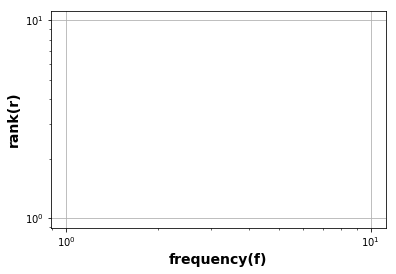

In [44]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
fd = FreqDist()
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd[word]
ranks = []
freqs = []
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

plt.loglog(ranks, freqs)
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

<br></br>
## 5 유사척도
다양한 평가를 위한 유사척도 도구를 제공

In [46]:
from __future__ import print_function
from nltk.metrics import *
training = 'PERSON OTHER PERSON OTHER OTHER ORGANIZATION'.split()
training

['PERSON', 'OTHER', 'PERSON', 'OTHER', 'OTHER', 'ORGANIZATION']

In [47]:
testing = 'PERSON OTHER OTHER OTHER OTHER OTHER'.split()
testing

['PERSON', 'OTHER', 'OTHER', 'OTHER', 'OTHER', 'OTHER']

In [49]:
trainset = set(training)
testset = set(testing)
precision(trainset,testset)

1.0

In [51]:
print(accuracy(training,testing))
print(recall(trainset,testset))
print(f_measure(trainset,testset))

0.6666666666666666
0.6666666666666666
0.8


### 01 편집거리 알고리즘을 사용한 유사척도
Edit Distance(Levenshtein edit distance) : nltk.matric 에 포함된 알고리즘

In [52]:
# 두 단어/ 문장이 같기 위해선 편집을 몇번 해야 하는지를 수치로 표시
import nltk
from nltk.metrics import edit_distance
print(edit_distance("relate","relation"))
print(edit_distance("suggestion","calculation"))

3
7


### 02 자카드 계수를 사용한 유사척도
http://socurites.com/data-analysis/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D-4-%EC%9C%A0%EC%82%AC%EB%8F%84similarity%EC%99%80-%EA%B1%B0

In [53]:
# 비대칭 이진 속성에 대한 유사도를 계산
from nltk.metrics import jaccard_distance
X=set([10,20,30,40])
Y=set([20,30,60])
print(jaccard_distance(X,Y))

0.6


### 03 이진거리 매트릭
두 라벨의 동일성을 0 ~ 1 사이의 숫자로 출력

In [55]:
# 이진거리 매트릭 함수
def binary_distance(label1, label2):
    return 0.0 if label1 == label2 else 1.0

In [56]:
import nltk
from nltk.metrics import *
X = set([10,20,30,40])
Y= set([30,50,70])
print(binary_distance(X, Y))

1.0


In [57]:
import nltk
from nltk.util import ngrams
from nltk.corpus import alpino
print(alpino.words())
trigrams_tokens=ngrams(alpino.words(),3)
for i in trigrams_tokens:
    print(i)

['De', 'verzekeringsmaatschappijen', 'verhelen', ...]
('De', 'verzekeringsmaatschappijen', 'verhelen')
('verzekeringsmaatschappijen', 'verhelen', 'niet')
('verhelen', 'niet', 'dat')
('niet', 'dat', 'ook')
('dat', 'ook', 'de')
('ook', 'de', 'rentegrondslag')
('de', 'rentegrondslag', 'van')
('rentegrondslag', 'van', 'vier')
('van', 'vier', 'procent')
('vier', 'procent', 'nog')
('procent', 'nog', 'een')
('nog', 'een', 'ruime')
('een', 'ruime', 'marge')
('ruime', 'marge', 'laat')
('marge', 'laat', 'ten')
('laat', 'ten', 'opzichte')
('ten', 'opzichte', 'van')
('opzichte', 'van', 'de')
('van', 'de', 'thans')
('de', 'thans', 'geldende')
('thans', 'geldende', 'rentestand')
('geldende', 'rentestand', '.')
('rentestand', '.', 'Gezien')
('.', 'Gezien', 'de')
('Gezien', 'de', 'lange')
('de', 'lange', 'duur')
('lange', 'duur', 'van')
('duur', 'van', 'vele')
('van', 'vele', 'verzekeringscontracten')
('vele', 'verzekeringscontracten', 'is')
('verzekeringscontracten', 'is', 'dit')
('is', 'dit', 'onver

('de', 'pantalons', 'met')
('pantalons', 'met', 'bont')
('met', 'bont', 'zonder')
('bont', 'zonder', 'dat')
('zonder', 'dat', 'een')
('dat', 'een', 'vrouw')
('een', 'vrouw', 'er')
('vrouw', 'er', 'een')
('er', 'een', 'prop')
('een', 'prop', 'in')
('prop', 'in', 'wordt')
('in', 'wordt', '.')
('wordt', '.', 'Zijn')
('.', 'Zijn', 'blouses')
('Zijn', 'blouses', 'zijn')
('blouses', 'zijn', 'tunieken')
('zijn', 'tunieken', 'tot')
('tunieken', 'tot', 'halfweg')
('tot', 'halfweg', 'de')
('halfweg', 'de', 'dij')
('de', 'dij', 'en')
('dij', 'en', '&apos;s')
('en', '&apos;s', 'avonds')
('&apos;s', 'avonds', 'maakt')
('avonds', 'maakt', 'hij')
('maakt', 'hij', 'die')
('hij', 'die', 'tunieken')
('die', 'tunieken', 'uit')
('tunieken', 'uit', 'fantastische')
('uit', 'fantastische', 'brokaatstoffen')
('fantastische', 'brokaatstoffen', 'en')
('brokaatstoffen', 'en', 'zo')
('en', 'zo', 'lang')
('zo', 'lang', ',')
('lang', ',', 'dat')
(',', 'dat', 'de')
('dat', 'de', 'pantalon')
('de', 'pantalon', 'erond

('als', 'gevolg', 'van')
('gevolg', 'van', 'te')
('van', 'te', 'late')
('te', 'late', 'hulp')
('late', 'hulp', ',')
('hulp', ',', 'dan')
(',', 'dan', 'zou')
('dan', 'zou', 'de')
('zou', 'de', 'prijsindex')
('de', 'prijsindex', 'stijgen')
('prijsindex', 'stijgen', '.')
('stijgen', '.', 'Volgens')
('.', 'Volgens', 'de')
('Volgens', 'de', 'Indonesische')
('de', 'Indonesische', 'zienswijze')
('Indonesische', 'zienswijze', ',')
('zienswijze', ',', 'zou')
(',', 'zou', 'dat')
('zou', 'dat', 'een')
('dat', 'een', 'nieuwe')
('een', 'nieuwe', 'inflatie')
('nieuwe', 'inflatie', 'betekenen')
('inflatie', 'betekenen', '.')
('betekenen', '.', 'Na')
('.', 'Na', 'een')
('Na', 'een', 'half')
('een', 'half', 'uur')
('half', 'uur', 'was')
('uur', 'was', 'het')
('was', 'het', 'de')
('het', 'de', 'goed')
('de', 'goed', 'spelende')
('goed', 'spelende', 'Seemann')
('spelende', 'Seemann', 'die')
('Seemann', 'die', 'het')
('die', 'het', 'hoofd')
('het', 'hoofd', 'van')
('hoofd', 'van', 'Nuninga')
('van', 'Nuni

('Met', '354', 'punten')
('354', 'punten', 'wint')
('punten', 'wint', 'mevrouw')
('wint', 'mevrouw', 'A.')
('mevrouw', 'A.', 'C.')
('A.', 'C.', 'Muller-Meijers')
('C.', 'Muller-Meijers', ',')
('Muller-Meijers', ',', 'Stationsweg')
(',', 'Stationsweg', '92')
('Stationsweg', '92', ',')
('92', ',', 'Flat')
(',', 'Flat', '501')
('Flat', '501', ',')
('501', ',', 'Ede')
(',', 'Ede', ',')
('Ede', ',', 'de')
(',', 'de', 'ladderprijs')
('de', 'ladderprijs', 'voor')
('ladderprijs', 'voor', 'haar')
('voor', 'haar', 'op')
('haar', 'op', '24')
('op', '24', 'februari')
('24', 'februari', '1966')
('februari', '1966', 'begonnen')
('1966', 'begonnen', 'derde')
('begonnen', 'derde', 'laddertocht')
('derde', 'laddertocht', '.')
('laddertocht', '.', '&quot;')
('.', '&quot;', 'Ik')
('&quot;', 'Ik', 'werk')
('Ik', 'werk', 'in')
('werk', 'in', 'ieder')
('in', 'ieder', 'geval')
('ieder', 'geval', 'gewoon')
('geval', 'gewoon', 'door')
('gewoon', 'door', '&quot;')
('door', '&quot;', ',')
('&quot;', ',', 'zei')


('hadden', 'Churchill', 'en')
('Churchill', 'en', 'Schweitzer')
('en', 'Schweitzer', 'hun')
('Schweitzer', 'hun', 'strijd')
('hun', 'strijd', 'met')
('strijd', 'met', 'totale')
('met', 'totale', 'inzet')
('totale', 'inzet', 'gestreden')
('inzet', 'gestreden', '.')
('gestreden', '.', 'Op')
('.', 'Op', '25')
('Op', '25', 'april')
('25', 'april', '1969')
('april', '1969', 'om')
('1969', 'om', 'halfdrie')
('om', 'halfdrie', 'in')
('halfdrie', 'in', 'de')
('in', 'de', 'middag')
('de', 'middag', 'stonden')
('middag', 'stonden', '20')
('stonden', '20', 'schoolkinderen')
('20', 'schoolkinderen', 'van')
('schoolkinderen', 'van', '7')
('van', '7', 'en')
('7', 'en', '8')
('en', '8', 'jaar')
('8', 'jaar', 'op')
('jaar', 'op', 'de')
('op', 'de', 'stoep')
('de', 'stoep', 'bij')
('stoep', 'bij', 'een')
('bij', 'een', 'zebrapad')
('een', 'zebrapad', '.')
('zebrapad', '.', 'Zij')
('.', 'Zij', 'staken')
('Zij', 'staken', 'niet')
('staken', 'niet', 'over')
('niet', 'over', ',')
('over', ',', 'ze')
(',', 

('in', 'fine', 'art')
('fine', 'art', '&quot;')
('art', '&quot;', 'aan')
('&quot;', 'aan', 'de')
('aan', 'de', 'universiteit')
('de', 'universiteit', 'van')
('universiteit', 'van', 'Californie')
('van', 'Californie', 'te')
('Californie', 'te', 'Berkeley')
('te', 'Berkeley', '.')
('Berkeley', '.', 'Hij')
('.', 'Hij', 'toonde')
('Hij', 'toonde', 'die')
('toonde', 'die', 'reeks')
('die', 'reeks', 'bij')
('reeks', 'bij', 'Galerie')
('bij', 'Galerie', 'De')
('Galerie', 'De', 'Sfinx')
('De', 'Sfinx', '.')
('Sfinx', '.', 'Inmiddels')
('.', 'Inmiddels', 'is')
('Inmiddels', 'is', 'hij')
('is', 'hij', 'voorgoed')
('hij', 'voorgoed', 'terug')
('voorgoed', 'terug', 'en')
('terug', 'en', 'heeft')
('en', 'heeft', 'hij')
('heeft', 'hij', 'dat')
('hij', 'dat', 'diploma')
('dat', 'diploma', 'in')
('diploma', 'in', 'zijn')
('in', 'zijn', 'zak')
('zijn', 'zak', '.')
('zak', '.', 'Caris')
('.', 'Caris', 'heeft')
('Caris', 'heeft', 'een')
('heeft', 'een', 'lange')
('een', 'lange', 'aanloop')
('lange', 'aan

('.', 'De', 'geleidelijke')
('De', 'geleidelijke', 'wijziging')
('geleidelijke', 'wijziging', ',')
('wijziging', ',', 'in')
(',', 'in', 'het')
('in', 'het', 'proces')
('het', 'proces', 'van')
('proces', 'van', 'besluitsvorming')
('van', 'besluitsvorming', 'is')
('besluitsvorming', 'is', 'daarvan')
('is', 'daarvan', 'de')
('daarvan', 'de', 'weerspiegeling')
('de', 'weerspiegeling', '.')
('weerspiegeling', '.', 'Op')
('.', 'Op', 'internationaal')
('Op', 'internationaal', 'vlak')
('internationaal', 'vlak', 'raken')
('vlak', 'raken', 'bedrijfsleven')
('raken', 'bedrijfsleven', ',')
('bedrijfsleven', ',', 'overheid')
(',', 'overheid', 'en')
('overheid', 'en', 'organisaties')
('en', 'organisaties', 'steeds')
('organisaties', 'steeds', 'meer')
('steeds', 'meer', 'bij')
('meer', 'bij', 'elkaar')
('bij', 'elkaar', 'betrokken')
('elkaar', 'betrokken', '.')
('betrokken', '.', 'Er')
('.', 'Er', 'is')
('Er', 'is', 'duidelijk')
('is', 'duidelijk', 'sprake')
('duidelijk', 'sprake', 'van')
('sprake', 

('.', '&quot;', 'Ik')
('&quot;', 'Ik', 'kan')
('Ik', 'kan', 'mij')
('kan', 'mij', 'niet')
('mij', 'niet', 'verenigen')
('niet', 'verenigen', 'met')
('verenigen', 'met', 'deze')
('met', 'deze', 'straffe')
('deze', 'straffe', 'bestuursmaatregel')
('straffe', 'bestuursmaatregel', ';')
('bestuursmaatregel', ';', 'ik')
(';', 'ik', 'onderschrijf')
('ik', 'onderschrijf', 'de')
('onderschrijf', 'de', 'vooruitstrevende')
('de', 'vooruitstrevende', 'zienswijze')
('vooruitstrevende', 'zienswijze', 'van')
('zienswijze', 'van', 'de')
('van', 'de', 'Salvoredactie')
('de', 'Salvoredactie', 'veel')
('Salvoredactie', 'veel', 'meer')
('veel', 'meer', 'dan')
('meer', 'dan', 'het')
('dan', 'het', 'erg')
('het', 'erg', 'conservatieve')
('erg', 'conservatieve', 'standpunt')
('conservatieve', 'standpunt', 'van')
('standpunt', 'van', 'het')
('van', 'het', 'Nkt-bestuur')
('het', 'Nkt-bestuur', '.')
('Nkt-bestuur', '.', '&quot;')
('.', '&quot;', 'Hij')
('&quot;', 'Hij', 'acht')
('Hij', 'acht', 'het')
('acht', '

('Cahn', '.', '&quot;')
('.', '&quot;', 'Nog')
('&quot;', 'Nog', 'steeds')
('Nog', 'steeds', 'is')
('steeds', 'is', 'het')
('is', 'het', 'hier')
('het', 'hier', 'niet')
('hier', 'niet', 'mogelijk')
('niet', 'mogelijk', 'aan')
('mogelijk', 'aan', 'artsen')
('aan', 'artsen', 'en')
('artsen', 'en', 'aanstaande')
('en', 'aanstaande', 'artsen')
('aanstaande', 'artsen', 'een')
('artsen', 'een', 'verantwoord')
('een', 'verantwoord', 'geriatrische')
('verantwoord', 'geriatrische', 'scholing')
('geriatrische', 'scholing', 'te')
('scholing', 'te', 'geven')
('te', 'geven', '.')
('geven', '.', 'Ook')
('.', 'Ook', 'hier')
('Ook', 'hier', 'wreekt')
('hier', 'wreekt', 'zich')
('wreekt', 'zich', 'de')
('zich', 'de', 'gebrekkige')
('de', 'gebrekkige', 'aansluiting')
('gebrekkige', 'aansluiting', 'tussen')
('aansluiting', 'tussen', 'universiteit')
('tussen', 'universiteit', 'en')
('universiteit', 'en', 'maatschappij')
('en', 'maatschappij', '&quot;')
('maatschappij', '&quot;', '.')
('&quot;', '.', 'Dr.'

('plastic', 'oogleden', 'waaraan')
('oogleden', 'waaraan', 'centimeters')
('waaraan', 'centimeters', 'lange')
('centimeters', 'lange', 'wimpers')
('lange', 'wimpers', 'kleven')
('wimpers', 'kleven', '.')
('kleven', '.', 'Ze')
('.', 'Ze', 'loert')
('Ze', 'loert', 'daar')
('loert', 'daar', '-')
('daar', '-', 'zo')
('-', 'zo', 'mogelijk')
('zo', 'mogelijk', '-')
('mogelijk', '-', 'onderuit')
('-', 'onderuit', 'en')
('onderuit', 'en', 'stommelt')
('en', 'stommelt', 'dus')
('stommelt', 'dus', 'vrijwel')
('dus', 'vrijwel', 'blindelings')
('vrijwel', 'blindelings', ',')
('blindelings', ',', 'als')
(',', 'als', 'slaapdronken')
('als', 'slaapdronken', ',')
('slaapdronken', ',', 'maar')
(',', 'maar', 'altijd')
('maar', 'altijd', 'ritmisch')
('altijd', 'ritmisch', ',')
('ritmisch', ',', 'door')
(',', 'door', 'het')
('door', 'het', 'leven')
('het', 'leven', '.')
('leven', '.', 'Ze')
('.', 'Ze', 'draagt')
('Ze', 'draagt', 'in')
('draagt', 'in', 'zijn')
('in', 'zijn', 'nieuwe')
('zijn', 'nieuwe', 's

('aantal', 'al', 'of')
('al', 'of', 'niet')
('of', 'niet', 'nieuwe')
('niet', 'nieuwe', 'tractoren')
('nieuwe', 'tractoren', '.')
('tractoren', '.', 'Van')
('.', 'Van', 'dat')
('Van', 'dat', 'alles')
('dat', 'alles', 'bleef')
('alles', 'bleef', 'niets')
('bleef', 'niets', 'heel')
('niets', 'heel', '.')
('heel', '.', 'De')
('.', 'De', 'heer')
('De', 'heer', 'Van')
('heer', 'Van', 'der')
('Van', 'der', 'Velde')
('der', 'Velde', 'heeft')
('Velde', 'heeft', 'van')
('heeft', 'van', 'het')
('van', 'het', 'gebeurde')
('het', 'gebeurde', 'niets')
('gebeurde', 'niets', 'gemerkt')
('niets', 'gemerkt', '.')
('gemerkt', '.', 'In')
('.', 'In', 'de')
('In', 'de', 'Clarastichting')
('de', 'Clarastichting', 'te')
('Clarastichting', 'te', 'Rotterdam')
('te', 'Rotterdam', 'is')
('Rotterdam', 'is', 'in')
('is', 'in', 'de')
('in', 'de', 'nacht')
('de', 'nacht', 'van')
('nacht', 'van', 'vrijdag')
('van', 'vrijdag', 'op')
('vrijdag', 'op', 'zaterdag')
('op', 'zaterdag', 'overleden')
('zaterdag', 'overleden'

('in', 'grote', 'meerderheid')
('grote', 'meerderheid', 'geweigerd')
('meerderheid', 'geweigerd', 'college')
('geweigerd', 'college', 'te')
('college', 'te', 'lopen')
('te', 'lopen', 'om')
('lopen', 'om', 'zo')
('om', 'zo', 'te')
('zo', 'te', 'protesteren')
('te', 'protesteren', 'tegen')
('protesteren', 'tegen', 'de')
('tegen', 'de', 'bestuursplannen')
('de', 'bestuursplannen', 'van')
('bestuursplannen', 'van', 'minister')
('van', 'minister', 'Veringa')
('minister', 'Veringa', '.')
('Veringa', '.', 'In')
('.', 'In', 'de')
('In', 'de', 'rest')
('de', 'rest', 'van')
('rest', 'van', 'het')
('van', 'het', 'land')
('het', 'land', 'had')
('land', 'had', 'de')
('had', 'de', '&quot;')
('de', '&quot;', 'staking')
('&quot;', 'staking', '&quot;')
('staking', '&quot;', 'een')
('&quot;', 'een', 'zeer')
('een', 'zeer', 'beperkte')
('zeer', 'beperkte', 'omvang')
('beperkte', 'omvang', '.')
('omvang', '.', 'Overigens')
('.', 'Overigens', 'leek')
('Overigens', 'leek', 'het')
('leek', 'het', 'in')
('het

('van', '1500-1540', ',')
('1500-1540', ',', 'Verboden')
(',', 'Verboden', 'boeken')
('Verboden', 'boeken', 'en')
('boeken', 'en', 'opstandige')
('en', 'opstandige', 'drukkers')
('opstandige', 'drukkers', 'in')
('drukkers', 'in', 'de')
('in', 'de', 'hervormingstijd')
('de', 'hervormingstijd', '1948')
('hervormingstijd', '1948', ',')
('1948', ',', 'commentaar')
(',', 'commentaar', 'bij')
('commentaar', 'bij', 'enkele')
('bij', 'enkele', 'Vondeluitgaven')
('enkele', 'Vondeluitgaven', ',')
('Vondeluitgaven', ',', 'bibliografische')
(',', 'bibliografische', 'en')
('bibliografische', 'en', 'letterkundige')
('en', 'letterkundige', 'artikelen')
('letterkundige', 'artikelen', 'in')
('artikelen', 'in', 'Het')
('in', 'Het', 'Boek')
('Het', 'Boek', ',')
('Boek', ',', 'De')
(',', 'De', 'Nieuwe')
('De', 'Nieuwe', 'taalgids')
('Nieuwe', 'taalgids', ',')
('taalgids', ',', 'transactions')
(',', 'transactions', 'of')
('transactions', 'of', 'the')
('of', 'the', 'bibliographic')
('the', 'bibliographic', 

('zodat', 'van', 'de')
('van', 'de', 'forse')
('de', 'forse', 'winst')
('forse', 'winst', 'van')
('winst', 'van', 'woensdag')
('van', 'woensdag', 'nog')
('woensdag', 'nog', 'altijd')
('nog', 'altijd', 'zo&apos;n')
('altijd', 'zo&apos;n', 'punt')
('zo&apos;n', 'punt', 'of')
('punt', 'of', '10')
('of', '10', 'overbleef')
('10', 'overbleef', '.')
('overbleef', '.', 'De')
('.', 'De', 'handel')
('De', 'handel', 'was')
('handel', 'was', 'begrijpelijkerwijs')
('was', 'begrijpelijkerwijs', 'minder')
('begrijpelijkerwijs', 'minder', 'actief')
('minder', 'actief', 'dan')
('actief', 'dan', 'de')
('dan', 'de', 'vorige')
('de', 'vorige', 'dag')
('vorige', 'dag', ',')
('dag', ',', 'wat')
(',', 'wat', 'leidde')
('wat', 'leidde', 'tot')
('leidde', 'tot', 'een')
('tot', 'een', 'omzet')
('een', 'omzet', 'van')
('omzet', 'van', 'rond')
('van', 'rond', '11')
('rond', '11', '1/2')
('11', '1/2', 'miljoen')
('1/2', 'miljoen', 'aandelen')
('miljoen', 'aandelen', ',')
('aandelen', ',', 'of')
(',', 'of', 'ca.')

('.', 'De', 'prijs')
('De', 'prijs', 'werd')
('prijs', 'werd', 'vastgesteld')
('werd', 'vastgesteld', 'op')
('vastgesteld', 'op', '6.05')
('op', '6.05', 'dollar')
('6.05', 'dollar', '.')
('dollar', '.', 'Er')
('.', 'Er', 'bleek')
('Er', 'bleek', 'belangstelling')
('bleek', 'belangstelling', 'voor')
('belangstelling', 'voor', 'deze')
('voor', 'deze', 'stukken')
('deze', 'stukken', 'te')
('stukken', 'te', 'bestaan')
('te', 'bestaan', '.')
('bestaan', '.', 'In')
('.', 'In', 'de')
('In', 'de', 'lokale')
('de', 'lokale', 'markt')
('lokale', 'markt', 'was')
('markt', 'was', 'Interlas')
('was', 'Interlas', '9')
('Interlas', '9', 'p.')
('9', 'p.', 'beter')
('p.', 'beter', '.')
('beter', '.', 'Ook')
('.', 'Ook', 'Bernet')
('Ook', 'Bernet', 'kon')
('Bernet', 'kon', 'eenzelfde')
('kon', 'eenzelfde', 'terreinwinst')
('eenzelfde', 'terreinwinst', 'behalen')
('terreinwinst', 'behalen', '.')
('behalen', '.', 'Er')
('.', 'Er', 'bestaat')
('Er', 'bestaat', 'dan')
('bestaat', 'dan', 'ook')
('dan', 'ook'

('of', 'zelfs', 'snijdende')
('zelfs', 'snijdende', '.')
('snijdende', '.', 'De')
('.', 'De', 'laatste')
('De', 'laatste', 'vorm')
('laatste', 'vorm', 'nadert')
('vorm', 'nadert', 'het')
('nadert', 'het', 'sarcasme')
('het', 'sarcasme', ',')
('sarcasme', ',', 'ook')
(',', 'ook', 'een')
('ook', 'een', 'aan')
('een', 'aan', 'het')
('aan', 'het', 'Grieks')
('het', 'Grieks', 'ontleend')
('Grieks', 'ontleend', 'woord')
('ontleend', 'woord', ',')
('woord', ',', 'dat')
(',', 'dat', 'behoort')
('dat', 'behoort', 'bij')
('behoort', 'bij', 'het')
('bij', 'het', 'werkwoord')
('het', 'werkwoord', 'sarkadzein')
('werkwoord', 'sarkadzein', ':')
('sarkadzein', ':', 'vaneenscheuren')
(':', 'vaneenscheuren', ',')
('vaneenscheuren', ',', 'openrijten')
(',', 'openrijten', ',')
('openrijten', ',', 'gevormd')
(',', 'gevormd', 'van')
('gevormd', 'van', 'het')
('van', 'het', 'zelfstandige')
('het', 'zelfstandige', 'naamwoord')
('zelfstandige', 'naamwoord', 'sarx')
('naamwoord', 'sarx', ':')
('sarx', ':', 'vl

('strokartonsituaties', '&quot;', 'is')
('&quot;', 'is', 'een')
('is', 'een', 'poging')
('een', 'poging', '.')
('poging', '.', 'Bonies')
('.', 'Bonies', 'wil')
('Bonies', 'wil', 'communiceren')
('wil', 'communiceren', ',')
('communiceren', ',', 'daarom')
(',', 'daarom', 'heeft')
('daarom', 'heeft', 'hij')
('heeft', 'hij', 'strokarton')
('hij', 'strokarton', 'gekozen')
('strokarton', 'gekozen', 'omdat')
('gekozen', 'omdat', 'het')
('omdat', 'het', 'veel')
('het', 'veel', 'voor')
('veel', 'voor', 'Groningers')
('voor', 'Groningers', 'betekent')
('Groningers', 'betekent', '.')
('betekent', '.', 'Maar')
('.', 'Maar', 'alleen')
('Maar', 'alleen', 'in')
('alleen', 'in', 'Groningen')
('in', 'Groningen', '.')
('Groningen', '.', '&quot;')
('.', '&quot;', 'In')
('&quot;', 'In', 'Parijs')
('In', 'Parijs', 'zou')
('Parijs', 'zou', 'een')
('zou', 'een', 'strokartonsituatie')
('een', 'strokartonsituatie', 'onzin')
('strokartonsituatie', 'onzin', 'zijn')
('onzin', 'zijn', ',')
('zijn', ',', 'en')
(',

('door', 'de', 'firma')
('de', 'firma', 'H.')
('firma', 'H.', 'K.')
('H.', 'K.', 'Bol')
('K.', 'Bol', 'en')
('Bol', 'en', 'Zn.')
('en', 'Zn.', 'te')
('Zn.', 'te', 'Groningen')
('te', 'Groningen', 'en')
('Groningen', 'en', 'architect')
('en', 'architect', 'C.')
('architect', 'C.', 'Rietveld')
('C.', 'Rietveld', '.')
('Rietveld', '.', 'In')
('.', 'In', 'het')
('In', 'het', 'oog')
('het', 'oog', 'springt')
('oog', 'springt', 'vooral')
('springt', 'vooral', 'de')
('vooral', 'de', 'kunststof')
('de', 'kunststof', 'voorgevel')
('kunststof', 'voorgevel', ',')
('voorgevel', ',', 'die')
(',', 'die', 'is')
('die', 'is', 'opgebouwd')
('is', 'opgebouwd', 'uit')
('opgebouwd', 'uit', 'grote')
('uit', 'grote', 'vierkante')
('grote', 'vierkante', 'blokken')
('vierkante', 'blokken', '.')
('blokken', '.', 'In')
('.', 'In', 'de')
('In', 'de', 'uit')
('de', 'uit', 'twee')
('uit', 'twee', 'verdiepingen')
('twee', 'verdiepingen', 'bestaande')
('verdiepingen', 'bestaande', 'verkoopruimten')
('bestaande', 've

('er', ',', 'als')
(',', 'als', 'het')
('als', 'het', 'deze')
('het', 'deze', 'regering')
('deze', 'regering', 'ernst')
('regering', 'ernst', 'is')
('ernst', 'is', ',')
('is', ',', 'het')
(',', 'het', 'een')
('het', 'een', 'en')
('een', 'en', 'ander')
('en', 'ander', 'van')
('ander', 'van', 'moeten')
('van', 'moeten', 'onthullen')
('moeten', 'onthullen', '.')
('onthullen', '.', 'Zij')
('.', 'Zij', 'moet')
('Zij', 'moet', 'dan')
('moet', 'dan', 'gevolg')
('dan', 'gevolg', 'geven')
('gevolg', 'geven', 'aan')
('geven', 'aan', 'een')
('aan', 'een', 'motie')
('een', 'motie', ',')
('motie', ',', 'ingediend')
(',', 'ingediend', 'door')
('ingediend', 'door', 'de')
('door', 'de', 'heren')
('de', 'heren', 'Krosse')
('heren', 'Krosse', 'KVP')
('Krosse', 'KVP', ',')
('KVP', ',', 'Boersma')
(',', 'Boersma', 'AR')
('Boersma', 'AR', 'en')
('AR', 'en', 'Kikkert')
('en', 'Kikkert', 'CHU')
('Kikkert', 'CHU', 'tijdens')
('CHU', 'tijdens', 'het')
('tijdens', 'het', 'Verblifa-debat')
('het', 'Verblifa-deba

('graads', 'bevoegdheid', 'kunnen')
('bevoegdheid', 'kunnen', 'krijgen')
('kunnen', 'krijgen', 'door')
('krijgen', 'door', 'een')
('door', 'een', 'MO-A')
('een', 'MO-A', 'akte')
('MO-A', 'akte', 'te')
('akte', 'te', 'halen')
('te', 'halen', '.')
('halen', '.', 'Een')
('.', 'Een', 'dergelijke')
('Een', 'dergelijke', 'akte')
('dergelijke', 'akte', 'is')
('akte', 'is', 'echter')
('is', 'echter', 'niet')
('echter', 'niet', 'in')
('niet', 'in', 'een')
('in', 'een', 'jaar')
('een', 'jaar', 'te')
('jaar', 'te', 'halen')
('te', 'halen', '.')
('halen', '.', 'Wanneer')
('.', 'Wanneer', 'staatssecretaris')
('Wanneer', 'staatssecretaris', 'Grosheide')
('staatssecretaris', 'Grosheide', 'ook')
('Grosheide', 'ook', 'deze')
('ook', 'deze', 'groep')
('deze', 'groep', 'ongeveer')
('groep', 'ongeveer', '400')
('ongeveer', '400', 'leraren')
('400', 'leraren', 'via')
('leraren', 'via', 'eenjarige')
('via', 'eenjarige', 'cursussen')
('eenjarige', 'cursussen', 'op')
('cursussen', 'op', 'tweedegraads')
('op',

('hem', 'kon', 'mr.')
('kon', 'mr.', 'Steensma')
('mr.', 'Steensma', 'meedelen')
('Steensma', 'meedelen', ',')
('meedelen', ',', 'dat')
(',', 'dat', 'Schmitz')
('dat', 'Schmitz', 'en')
('Schmitz', 'en', 'ook')
('en', 'ook', 'Madera')
('ook', 'Madera', 'die')
('Madera', 'die', 'met')
('die', 'met', '2-6')
('met', '2-6', 'en')
('2-6', 'en', '0-1')
('en', '0-1', 'achterstond')
('0-1', 'achterstond', 'nog')
('achterstond', 'nog', 'een')
('nog', 'een', 'kans')
('een', 'kans', 'kregen')
('kans', 'kregen', '.')
('kregen', '.', 'Zij')
('.', 'Zij', 'moesten')
('Zij', 'moesten', 'nog')
('moesten', 'nog', 'dezelfde')
('nog', 'dezelfde', 'avond')
('dezelfde', 'avond', 'hun')
('avond', 'hun', 'partijen')
('hun', 'partijen', 'uitspelen')
('partijen', 'uitspelen', '.')
('uitspelen', '.', 'Iets')
('.', 'Iets', ',')
('Iets', ',', 'dat')
(',', 'dat', 'de')
('dat', 'de', 'regen')
('de', 'regen', 'echter')
('regen', 'echter', 'weer')
('echter', 'weer', 'verhinderde')
('weer', 'verhinderde', '.')
('verhind

('25', 'graden', 'had')
('graden', 'had', 'echter')
('had', 'echter', 'geen')
('echter', 'geen', 'baat')
('geen', 'baat', 'met')
('baat', 'met', 'bedreven')
('met', 'bedreven', 'tegenstanders')
('bedreven', 'tegenstanders', 'als')
('tegenstanders', 'als', 'Radovic')
('als', 'Radovic', ',')
('Radovic', ',', 'Strik')
(',', 'Strik', ',')
('Strik', ',', 'Vos')
(',', 'Vos', 'en')
('Vos', 'en', 'Jensen')
('en', 'Jensen', '.')
('Jensen', '.', 'De')
('.', 'De', 'nieuwe')
('De', 'nieuwe', 'PSV-Deen')
('nieuwe', 'PSV-Deen', 'had')
('PSV-Deen', 'had', 'Hutchinson')
('had', 'Hutchinson', ',')
('Hutchinson', ',', 'de')
(',', 'de', 'grote')
('de', 'grote', 'figuur')
('grote', 'figuur', 'in')
('figuur', 'in', 'de')
('in', 'de', 'Cupfinale')
('de', 'Cupfinale', 'tegen')
('Cupfinale', 'tegen', 'Leeds')
('tegen', 'Leeds', 'United')
('Leeds', 'United', ',')
('United', ',', 'volledig')
(',', 'volledig', 'in')
('volledig', 'in', 'zijn')
('in', 'zijn', 'macht')
('zijn', 'macht', '.')
('macht', '.', 'Cooke')

('loonwet', 'hebben', '.')
('hebben', '.', 'Voor')
('.', 'Voor', 'minister')
('Voor', 'minister', 'Roolvink')
('minister', 'Roolvink', 'is')
('Roolvink', 'is', 'dit')
('is', 'dit', 'amendement')
('dit', 'amendement', 'onaanvaardbaar')
('amendement', 'onaanvaardbaar', '.')
('onaanvaardbaar', '.', 'De')
('.', 'De', 'minister')
('De', 'minister', 'van')
('minister', 'van', 'sociale')
('van', 'sociale', 'zaken')
('sociale', 'zaken', 'zal')
('zaken', 'zal', 'deze')
('zal', 'deze', 'wijziging')
('deze', 'wijziging', 'op')
('wijziging', 'op', 'zijn')
('op', 'zijn', 'loonwet')
('zijn', 'loonwet', 'niet')
('loonwet', 'niet', 'zonder')
('niet', 'zonder', 'meer')
('zonder', 'meer', 'slikken')
('meer', 'slikken', '.')
('slikken', '.', 'Tijdens')
('.', 'Tijdens', 'een')
('Tijdens', 'een', 'bijeenkomst')
('een', 'bijeenkomst', 'van')
('bijeenkomst', 'van', 'arbeiders')
('van', 'arbeiders', 'en')
('arbeiders', 'en', 'studenten')
('en', 'studenten', 'in')
('studenten', 'in', 'De')
('in', 'De', 'Brakke

(';', 'meervoudig', 'kampioen')
('meervoudig', 'kampioen', 'van')
('kampioen', 'van', 'Europa')
('van', 'Europa', 'achter')
('Europa', 'achter', 'de')
('achter', 'de', 'dernies')
('de', 'dernies', '.')
('dernies', '.', 'Staab')
('.', 'Staab', ':')
('Staab', ':', '&quot;')
(':', '&quot;', 'Als')
('&quot;', 'Als', 'ik')
('Als', 'ik', 'dat')
('ik', 'dat', 'nou')
('dat', 'nou', 'wist')
('nou', 'wist', 'dan')
('wist', 'dan', 'zou')
('dan', 'zou', 'ik')
('zou', 'ik', 'waarschijnlijk')
('ik', 'waarschijnlijk', 'onmiddellijk')
('waarschijnlijk', 'onmiddellijk', 'gekozen')
('onmiddellijk', 'gekozen', 'worden')
('gekozen', 'worden', 'als')
('worden', 'als', 'wethouder')
('als', 'wethouder', 'van')
('wethouder', 'van', 'Financien')
('van', 'Financien', '.')
('Financien', '.', '&quot;')
('.', '&quot;', 'Als')
('&quot;', 'Als', 'dezelfde')
('Als', 'dezelfde', 'na')
('dezelfde', 'na', 'een')
('na', 'een', 'vraag')
('een', 'vraag', 'van')
('vraag', 'van', 'Riezenkamp')
('van', 'Riezenkamp', 'hoe')
('

('vriezen', '.', 'Aan')
('.', 'Aan', 'een')
('Aan', 'een', 'gelijk')
('een', 'gelijk', 'spel')
('gelijk', 'spel', 'zouden')
('spel', 'zouden', 'de')
('zouden', 'de', 'zwartgroenen')
('de', 'zwartgroenen', 'dus')
('zwartgroenen', 'dus', 'voldoende')
('dus', 'voldoende', 'hebben')
('voldoende', 'hebben', 'om')
('hebben', 'om', 'zich')
('om', 'zich', 'kampioen')
('zich', 'kampioen', 'te')
('kampioen', 'te', 'mogen')
('te', 'mogen', 'noemen')
('mogen', 'noemen', '.')
('noemen', '.', 'Het')
('.', 'Het', 'liep')
('Het', 'liep', 'echter')
('liep', 'echter', 'anders')
('echter', 'anders', ',')
('anders', ',', 'want')
(',', 'want', 'na')
('want', 'na', 'een')
('na', 'een', 'uitermate')
('een', 'uitermate', 'spannende')
('uitermate', 'spannende', 'wedstrijd')
('spannende', 'wedstrijd', 'wonnen')
('wedstrijd', 'wonnen', 'de')
('wonnen', 'de', 'Haagse')
('de', 'Haagse', 'reserves')
('Haagse', 'reserves', 'met')
('reserves', 'met', '12-11')
('met', '12-11', '.')
('12-11', '.', 'Operatie')
('.', 'Op

('kleren', 'achter', '.')
('achter', '.', 'Een')
('.', 'Een', 'is')
('Een', 'is', 'ook')
('is', 'ook', ',')
('ook', ',', 'dat')
(',', 'dat', 'het')
('dat', 'het', 'nooit')
('het', 'nooit', 'helemaal')
('nooit', 'helemaal', 'zeker')
('helemaal', 'zeker', 'is')
('zeker', 'is', ',')
('is', ',', 'dat')
(',', 'dat', 'een')
('dat', 'een', 'tocht')
('een', 'tocht', 'doorgaat')
('tocht', 'doorgaat', '.')
('doorgaat', '.', 'Wadlopen')
('.', 'Wadlopen', 'is')
('Wadlopen', 'is', 'alleen')
('is', 'alleen', 'verantwoord')
('alleen', 'verantwoord', 'onder')
('verantwoord', 'onder', 'gunstige')
('onder', 'gunstige', 'weersomstandigheden')
('gunstige', 'weersomstandigheden', '.')
('weersomstandigheden', '.', 'En')
('.', 'En', '..')
('En', '..', 'men')
('..', 'men', 'moet')
('men', 'moet', 'onder')
('moet', 'onder', 'goede')
('onder', 'goede', 'leiding')
('goede', 'leiding', 'lopen')
('leiding', 'lopen', '!')
('lopen', '!', 'Er')
('!', 'Er', 'zijn')
('Er', 'zijn', 'in')
('zijn', 'in', 'Groningen')
('in

('die', 'nooit', 'geheel')
('nooit', 'geheel', 'volbracht')
('geheel', 'volbracht', 'zal')
('volbracht', 'zal', 'zijn')
('zal', 'zijn', 'en')
('zijn', 'en', 'altijd')
('en', 'altijd', 'gepaard')
('altijd', 'gepaard', 'zal')
('gepaard', 'zal', 'gaan')
('zal', 'gaan', 'met')
('gaan', 'met', 'menselijk')
('met', 'menselijk', 'falen')
('menselijk', 'falen', 'en')
('falen', 'en', 'slagen')
('en', 'slagen', '.')
('slagen', '.', 'In')
('.', 'In', 'deze')
('In', 'deze', 'geest')
('deze', 'geest', 'herdenken')
('geest', 'herdenken', 'wij')
('herdenken', 'wij', 'allen')
('wij', 'allen', 'die')
('allen', 'die', 'hun')
('die', 'hun', 'leven')
('hun', 'leven', 'gaven')
('leven', 'gaven', '.')
('gaven', '.', '&quot;')
('.', '&quot;', 'Ook')
('&quot;', 'Ook', 'Jimmy')
('Ook', 'Jimmy', 'Johnstone')
('Jimmy', 'Johnstone', ',')
('Johnstone', ',', 'die')
(',', 'die', '-')
('die', '-', 'zoals')
('-', 'zoals', 'hij')
('zoals', 'hij', 'zegt')
('hij', 'zegt', '-')
('zegt', '-', 'zich')
('-', 'zich', 'met')
(

('camera', 'observeert', 'een')
('observeert', 'een', 'Indianenfeest')
('een', 'Indianenfeest', '-')
('Indianenfeest', '-', 'maar')
('-', 'maar', 'niet')
('maar', 'niet', 'om')
('niet', 'om', 'de')
('om', 'de', 'toeschouwer')
('de', 'toeschouwer', 'te')
('toeschouwer', 'te', 'vergasten')
('te', 'vergasten', 'op')
('vergasten', 'op', 'pittoreske')
('op', 'pittoreske', 'folkloristische')
('pittoreske', 'folkloristische', 'observaties')
('folkloristische', 'observaties', 'het')
('observaties', 'het', '&quot;')
('het', '&quot;', 'toeristische')
('&quot;', 'toeristische', '&quot;')
('toeristische', '&quot;', 'standpunt')
('&quot;', 'standpunt', ':')
('standpunt', ':', 'zijn')
(':', 'zijn', 'camera')
('zijn', 'camera', 'vangt')
('camera', 'vangt', 'alleen')
('vangt', 'alleen', 'af')
('alleen', 'af', 'en')
('af', 'en', 'toe')
('en', 'toe', ',')
('toe', ',', 'min')
(',', 'min', 'of')
('min', 'of', 'meer')
('of', 'meer', 'beschaamd')
('meer', 'beschaamd', ',')
('beschaamd', ',', 'een')
(',', 'e

('Naar', 'aanleiding', 'van')
('aanleiding', 'van', 'deze')
('van', 'deze', 'affaire')
('deze', 'affaire', ',')
('affaire', ',', 'die')
(',', 'die', 'de')
('die', 'de', 'gemoederen')
('de', 'gemoederen', 'in')
('gemoederen', 'in', 'de')
('in', 'de', 'badmintonwereld')
('de', 'badmintonwereld', ',')
('badmintonwereld', ',', 'en')
(',', 'en', 'daar')
('en', 'daar', 'niet')
('daar', 'niet', 'alleen')
('niet', 'alleen', ',')
('alleen', ',', 'uitvoerig')
(',', 'uitvoerig', 'in')
('uitvoerig', 'in', 'beweging')
('in', 'beweging', 'houden')
('beweging', 'houden', ',')
('houden', ',', 'heeft')
(',', 'heeft', 'hij')
('heeft', 'hij', 'dit')
('hij', 'dit', 'weekeinde')
('dit', 'weekeinde', 'schriftelijk')
('weekeinde', 'schriftelijk', 'ontslag')
('schriftelijk', 'ontslag', 'genomen')
('ontslag', 'genomen', 'als')
('genomen', 'als', 'bondscoach')
('als', 'bondscoach', '.')
('bondscoach', '.', 'De')
('.', 'De', 'inspecteur')
('De', 'inspecteur', 'der')
('inspecteur', 'der', 'rijksrecherche')
('der'

('70', 'jaar', 'en')
('jaar', 'en', 'of')
('en', 'of', 'hij')
('of', 'hij', 'het')
('hij', 'het', 'in')
('het', 'in', 'het')
('in', 'het', 'vijfde')
('het', 'vijfde', 'uur')
('vijfde', 'uur', 'nog')
('uur', 'nog', 'zal')
('nog', 'zal', 'kunnen')
('zal', 'kunnen', 'volhouden')
('kunnen', 'volhouden', ',')
('volhouden', ',', 'moet')
(',', 'moet', 'blijken')
('moet', 'blijken', '.')
('blijken', '.', 'De')
('.', 'De', 'eerste')
('De', 'eerste', 'twee')
('eerste', 'twee', 'maanden')
('twee', 'maanden', 'van')
('maanden', 'van', 'dit')
('van', 'dit', 'jaar')
('dit', 'jaar', 'geven')
('jaar', 'geven', 'ten')
('geven', 'ten', 'opzichte')
('ten', 'opzichte', 'van')
('opzichte', 'van', 'dezelfde')
('van', 'dezelfde', 'periode')
('dezelfde', 'periode', 'van')
('periode', 'van', '1969')
('van', '1969', 'een')
('1969', 'een', 'stijging')
('een', 'stijging', 'van')
('stijging', 'van', '30')
('van', '30', 'procent')
('30', 'procent', 'te')
('procent', 'te', 'zien')
('te', 'zien', '.')
('zien', '.', '

KeyboardInterrupt: 